# Project: FBI Gun Data Background Checks

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

**Analysing data from the FBI's National Instant Criminal Background Check System (NICS) and US Census Data**

The NICS [data](https://www.fbi.gov/file-repository/nics_firearm_checks_-_month_year_by_state_type.pdf/view) provides information on transaction submitted to NICS in order determine whether a prospective buyer is eligible to buy firearms or explosives. This is important to ensure that each customer does not have a criminal record or is eligible to make a purchase. 

The US Census [data](census.gov) contains several variables at the state level like population.

> **Questions explored in this notebook**:
> + Which states have the highest transactions submitted for background checks?
> + Is there a growth in attempt to purchase firearms from 1998 till 2017?
> + Which gun type is preferred?
> + Are more/less populated areas likely to purchase more firearms?

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [1]:
# importing useful libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
sns.set_palette("Accent") 
%matplotlib inline

In [2]:
# loading datasets
df_1 = pd.read_csv("gun_data.csv")
df_2 = pd.read_csv("US-census_data.csv")

**Let's inspect the NICS data first**

In [3]:
# looking at the first few rows of the NICS data
df_1.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506


In [4]:
# looking at the last five rows of the NICS data
df_1.tail()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
12480,1998-11,Virginia,0.0,NaN,14.0,2.0,NaN,8,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24
12481,1998-11,Washington,1.0,NaN,65.0,286.0,NaN,8,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,361
12482,1998-11,West Virginia,3.0,NaN,149.0,251.0,NaN,5,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,408
12483,1998-11,Wisconsin,0.0,NaN,25.0,214.0,NaN,2,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,241
12484,1998-11,Wyoming,8.0,NaN,45.0,49.0,NaN,5,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,107


In [5]:
# checking the number of rows and columns
print("shape of df_1 \n", df_1.shape)

shape of df_1 
 (12485, 27)


In [6]:
# let's see more information on data types and null values
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   month                      12485 non-null  object 
 1   state                      12485 non-null  object 
 2   permit                     12461 non-null  float64
 3   permit_recheck             1100 non-null   float64
 4   handgun                    12465 non-null  float64
 5   long_gun                   12466 non-null  float64
 6   other                      5500 non-null   float64
 7   multiple                   12485 non-null  int64  
 8   admin                      12462 non-null  float64
 9   prepawn_handgun            10542 non-null  float64
 10  prepawn_long_gun           10540 non-null  float64
 11  prepawn_other              5115 non-null   float64
 12  redemption_handgun         10545 non-null  float64
 13  redemption_long_gun        10544 non-null  flo

In [7]:
# how many null values per columns are there?
print("no of null values in df_1 \n", df_1.isna().sum())

no of null values in df_1 
 month                            0
state                            0
permit                          24
permit_recheck               11385
handgun                         20
long_gun                        19
other                         6985
multiple                         0
admin                           23
prepawn_handgun               1943
prepawn_long_gun              1945
prepawn_other                 7370
redemption_handgun            1940
redemption_long_gun           1941
redemption_other              7370
returned_handgun             10285
returned_long_gun            10340
returned_other               10670
rentals_handgun              11495
rentals_long_gun             11660
private_sale_handgun          9735
private_sale_long_gun         9735
private_sale_other            9735
return_to_seller_handgun     10010
return_to_seller_long_gun     9735
return_to_seller_other       10230
totals                           0
dtype: int64


In [8]:
# checking for any duplicates
print("no of duplicated values in df_1 \n", df_1.duplicated().sum())

no of duplicated values in df_1 
 0


**Inspecting the US Census Data**

In [9]:
# looking at the first few rows
df_2.head()

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010",NaN,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",NaN,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%


In [10]:
# the last five rows of the dataset
df_2.tail()

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
80,FN,Footnote on this item in place of data,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81,NaN,Not available,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
82,S,Suppressed; does not meet publication standards,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
83,X,Not applicable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84,Z,Value greater than zero but less than half uni...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# checking number of samples and columns
print("shape of df_2 \n", df_2.shape)

shape of df_2 
 (85, 52)


In [12]:
# checking for more information on data types and null values of the data set
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 52 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Fact            80 non-null     object
 1   Fact Note       28 non-null     object
 2   Alabama         65 non-null     object
 3   Alaska          65 non-null     object
 4   Arizona         65 non-null     object
 5   Arkansas        65 non-null     object
 6   California      65 non-null     object
 7   Colorado        65 non-null     object
 8   Connecticut     65 non-null     object
 9   Delaware        65 non-null     object
 10  Florida         65 non-null     object
 11  Georgia         65 non-null     object
 12  Hawaii          65 non-null     object
 13  Idaho           65 non-null     object
 14  Illinois        65 non-null     object
 15  Indiana         65 non-null     object
 16  Iowa            65 non-null     object
 17  Kansas          65 non-null     object
 18  Kentucky    

In [13]:
# let's see the total of null values in each column
print("no of null values in df_2 \n", df_2.isna().sum())

no of null values in df_2 
 Fact               5
Fact Note         57
Alabama           20
Alaska            20
Arizona           20
Arkansas          20
California        20
Colorado          20
Connecticut       20
Delaware          20
Florida           20
Georgia           20
Hawaii            20
Idaho             20
Illinois          20
Indiana           20
Iowa              20
Kansas            20
Kentucky          20
Louisiana         20
Maine             20
Maryland          20
Massachusetts     20
Michigan          20
Minnesota         20
Mississippi       20
Missouri          20
Montana           20
Nebraska          20
Nevada            20
New Hampshire     20
New Jersey        20
New Mexico        20
New York          20
North Carolina    20
North Dakota      20
Ohio              20
Oklahoma          20
Oregon            20
Pennsylvania      20
Rhode Island      20
South Carolina    20
South Dakota      20
Tennessee         20
Texas             20
Utah              20
Vermon

In [14]:
# let's check for any duplicate rows
print("no of duplicated values in df_2 \n", df_2.duplicated().sum())

no of duplicated values in df_2 
 3


### Data Cleaning

Here, we are going to clean the data by taking care of missing values and incorrect data types.

We would also explore transforming the datasets for further exploration.

**Cleaning the first data set**

In [15]:
# We would keep only the columns with missing values less than or equal to 2000 in the first data set
max_nas = 2000
df_1 = df_1.loc[:, (df_1.isnull().sum(axis=0) <= max_nas)]

In [16]:
# let's see the remining columns and some more information
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   month                12485 non-null  object 
 1   state                12485 non-null  object 
 2   permit               12461 non-null  float64
 3   handgun              12465 non-null  float64
 4   long_gun             12466 non-null  float64
 5   multiple             12485 non-null  int64  
 6   admin                12462 non-null  float64
 7   prepawn_handgun      10542 non-null  float64
 8   prepawn_long_gun     10540 non-null  float64
 9   redemption_handgun   10545 non-null  float64
 10  redemption_long_gun  10544 non-null  float64
 11  totals               12485 non-null  int64  
dtypes: float64(8), int64(2), object(2)
memory usage: 1.1+ MB


In [17]:
# let's see some statistical data to help decide how to fill missing values
df_1.describe()

,permit,handgun,long_gun,multiple,admin,prepawn_handgun,prepawn_long_gun,redemption_handgun,redemption_long_gun,totals
count,12461.000000,12465.000000,12466.000000,12485.000000,12462.000000,10542.000000,10540.000000,10545.000000,10544.000000,12485.000000
mean,6413.629404,5940.881107,7810.847585,268.603364,58.898090,4.828021,7.834156,407.970413,599.332417,21595.725911
std,23752.338269,8618.584060,9309.846140,783.185073,604.814818,10.907756,16.468028,783.467053,952.144809,32591.418387
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,865.000000,2078.250000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4638.000000
50%,518.000000,3059.000000,5122.000000,125.000000,0.000000,0.000000,1.000000,39.000000,175.000000,12399.000000
75%,4272.000000,7280.000000,10380.750000,301.000000,0.000000,5.000000,8.000000,561.000000,872.000000,25453.000000
max,522188.000000,107224.000000,108058.000000,38907.000000,28083.000000,164.000000,269.000000,10046.000000,8831.000000,541978.000000


In [18]:
# we will fill the missing values with the mean
cols = ["permit", "handgun", "long_gun", "admin", "prepawn_handgun", "prepawn_long_gun", "redemption_handgun", "redemption_long_gun"]
df_1[cols] = df_1[cols].fillna(df_1.groupby("state")[cols].transform("mean"))

In [19]:
# confirming if thee are still any missing values
df_1.isna().sum()

month                  0
state                  0
permit                 0
handgun                0
long_gun               0
multiple               0
admin                  0
prepawn_handgun        0
prepawn_long_gun       0
redemption_handgun     0
redemption_long_gun    0
totals                 0
dtype: int64

In [20]:
# changing the data type of month column from string to date time
df_1["month"] = pd.to_datetime(df_1["month"], format="%Y/%m")

In [21]:
# checking to see changes
df_1.dtypes

month                  datetime64[ns]
state                          object
permit                        float64
handgun                       float64
long_gun                      float64
multiple                        int64
admin                         float64
prepawn_handgun               float64
prepawn_long_gun              float64
redemption_handgun            float64
redemption_long_gun           float64
totals                          int64
dtype: object

**Cleaning the second data set**

In [22]:
# the fact note column doesn't seem to provide much info so let's drop it
df_2.drop("Fact Note", axis=1, inplace=True)

In [23]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 51 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Fact            80 non-null     object
 1   Alabama         65 non-null     object
 2   Alaska          65 non-null     object
 3   Arizona         65 non-null     object
 4   Arkansas        65 non-null     object
 5   California      65 non-null     object
 6   Colorado        65 non-null     object
 7   Connecticut     65 non-null     object
 8   Delaware        65 non-null     object
 9   Florida         65 non-null     object
 10  Georgia         65 non-null     object
 11  Hawaii          65 non-null     object
 12  Idaho           65 non-null     object
 13  Illinois        65 non-null     object
 14  Indiana         65 non-null     object
 15  Iowa            65 non-null     object
 16  Kansas          65 non-null     object
 17  Kentucky        65 non-null     object
 18  Louisiana   

In [24]:
# let's also drop all rows with null values
df_2.dropna(inplace=True)

In [25]:
# confirming if thee are still any missing values
df_2.isna().sum()

Fact              0
Alabama           0
Alaska            0
Arizona           0
Arkansas          0
California        0
Colorado          0
Connecticut       0
Delaware          0
Florida           0
Georgia           0
Hawaii            0
Idaho             0
Illinois          0
Indiana           0
Iowa              0
Kansas            0
Kentucky          0
Louisiana         0
Maine             0
Maryland          0
Massachusetts     0
Michigan          0
Minnesota         0
Mississippi       0
Missouri          0
Montana           0
Nebraska          0
Nevada            0
New Hampshire     0
New Jersey        0
New Mexico        0
New York          0
North Carolina    0
North Dakota      0
Ohio              0
Oklahoma          0
Oregon            0
Pennsylvania      0
Rhode Island      0
South Carolina    0
South Dakota      0
Tennessee         0
Texas             0
Utah              0
Vermont           0
Virginia          0
Washington        0
West Virginia     0
Wisconsin         0


In [26]:
# let's check for any duplicate rows
print("no of duplicated values in df_2 \n", df_2.duplicated().sum())

no of duplicated values in df_2 
 0


In [27]:
# it would be better to have the columns as index instead in order to join with NICS data
df_2 = df_2.transpose()
df_2.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
Fact,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2...","Population, percent change - April 1, 2010 (es...","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, ...","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016,...","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2...","Persons 65 years and over, percent, April 1, 2010",...,"All firms, 2012","Men-owned firms, 2012","Women-owned firms, 2012","Minority-owned firms, 2012","Nonminority-owned firms, 2012","Veteran-owned firms, 2012","Nonveteran-owned firms, 2012","Population per square mile, 2010","Land area in square miles, 2010",FIPS Code
Alabama,"4,863,300","4,780,131",1.70%,"4,779,736",6.00%,6.40%,22.60%,23.70%,16.10%,13.80%,...,"374,153","203,604","137,630","92,219","272,651","41,943","316,984",94.4,"50,645.33","""01"""
Alaska,"741,894","710,249",4.50%,"710,231",7.30%,7.60%,25.20%,26.40%,10.40%,7.70%,...,"68,032","35,402","22,141","13,688","51,147","7,953","56,091",1.2,"570,640.95","""02"""
Arizona,"6,931,071","6,392,301",8.40%,"6,392,017",6.30%,7.10%,23.50%,25.50%,16.90%,13.80%,...,"499,926","245,243","182,425","135,313","344,981","46,780","427,582",56.3,"113,594.08","""04"""
Arkansas,"2,988,248","2,916,025",2.50%,"2,915,918",6.40%,6.80%,23.60%,24.40%,16.30%,14.40%,...,"231,959","123,158","75,962","35,982","189,029","25,915","192,988",56,"52,035.48","""05"""


In [28]:
# renaming the most recent population estimate column as "population"
df_2.rename(columns={0: "population"}, inplace=True)
df_2.head(3)

,population,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
Fact,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2...","Population, percent change - April 1, 2010 (es...","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, ...","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016,...","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2...","Persons 65 years and over, percent, April 1, 2010",...,"All firms, 2012","Men-owned firms, 2012","Women-owned firms, 2012","Minority-owned firms, 2012","Nonminority-owned firms, 2012","Veteran-owned firms, 2012","Nonveteran-owned firms, 2012","Population per square mile, 2010","Land area in square miles, 2010",FIPS Code
Alabama,"4,863,300","4,780,131",1.70%,"4,779,736",6.00%,6.40%,22.60%,23.70%,16.10%,13.80%,...,"374,153","203,604","137,630","92,219","272,651","41,943","316,984",94.4,"50,645.33","""01"""
Alaska,"741,894","710,249",4.50%,"710,231",7.30%,7.60%,25.20%,26.40%,10.40%,7.70%,...,"68,032","35,402","22,141","13,688","51,147","7,953","56,091",1.2,"570,640.95","""02"""


In [29]:
# dropping the fact index
df_2.drop(index=("Fact"), inplace=True)

In [30]:
# applying lambda function to remove commas for easy conversion to integer data type
df_2 = df_2.apply(lambda x: x.str.replace(",", ""))

In [31]:
# taking only the most recent variable on population estimates and converting to integer
df_2 = df_2[["population"]].astype(int)
df_2.head()

,population
Alabama,4863300
Alaska,741894
Arizona,6931071
Arkansas,2988248
California,39250017


<a id='eda'></a>
## Exploratory Data Analysis
>**We will begin asking questions to draw conclusions from the datasets**

### 1. Which states have the highest transactions submitted for background checks?

In [32]:
# grouping the first dataset by state
state_df = df_1.groupby("state").mean()
state_df.head()

,permit,handgun,long_gun,multiple,admin,prepawn_handgun,prepawn_long_gun,redemption_handgun,redemption_long_gun,totals
state,,,,,,,,,,
Alabama,4614.277533,9788.709251,11568.409692,463.568282,0.140969,22.078125,33.036458,1585.447917,1818.072917,29542.198238
Alaska,58.819383,1914.546256,2520.590308,127.330396,0.083700,5.432292,7.619792,162.187500,195.072917,5011.643172
Arizona,3129.995595,7847.876652,6523.180617,374.356828,29.264317,7.354167,4.739583,929.322917,589.458333,19496.537445
Arkansas,2237.669604,4253.674009,7327.118943,272.770925,9.453744,8.343750,20.807292,782.265625,1920.276042,16531.422907
California,28768.911894,26039.118943,26153.171806,915.700441,73.480176,0.000000,0.000000,192.000000,162.927083,83762.392070


> The table above groups the average checks submitted by state.
> We can gain more insights as to peculiarities of the different states when it comes to the number of checks submitted

Let's see some statistics about this new dataframe

In [33]:
state_df.describe()

,permit,handgun,long_gun,multiple,admin,prepawn_handgun,prepawn_long_gun,redemption_handgun,redemption_long_gun,totals
count,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000
mean,6401.395330,5931.377794,7798.963026,268.603364,58.791071,4.819795,7.819346,407.390937,598.424345,21595.725911
std,16055.483501,6515.319842,7956.022915,334.980079,251.089427,8.841989,12.397306,716.049362,908.686012,24700.118257
min,0.000000,0.013216,0.154185,0.008811,0.000000,0.000000,0.000000,0.000000,0.000000,2.035242
25%,161.973568,1314.059471,2539.015419,37.513216,0.059471,0.018284,0.041762,0.348958,0.578125,5201.669604
50%,1640.004405,4102.651982,5888.885463,169.044053,0.365639,0.593750,1.619792,60.125000,162.927083,15754.678414
75%,6240.526432,8422.607930,11085.784141,374.077093,11.171563,5.398438,8.335938,735.713542,895.539062,28487.962555
max,109809.599119,28607.189427,41337.629956,1620.977974,1819.013216,45.380208,50.708333,4371.921875,5117.557292,131112.044053


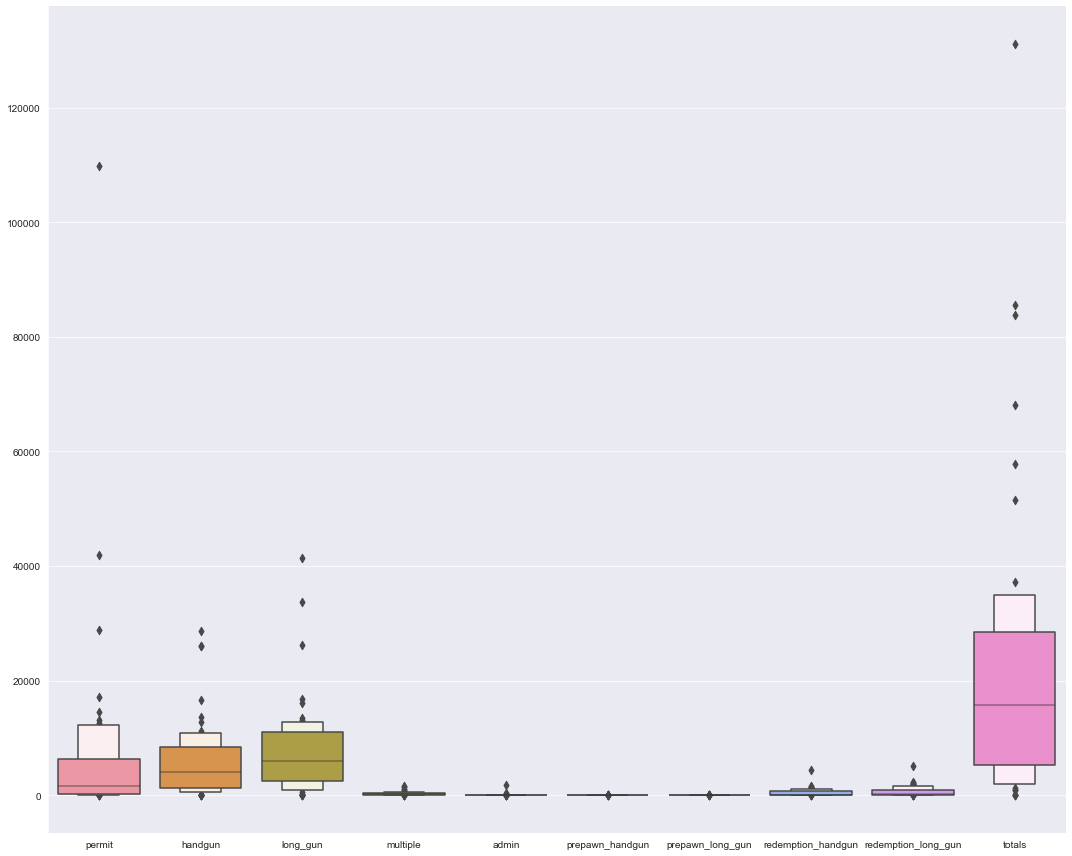

In [34]:
# visualizing the state_df to look at the statistics
sns.catplot(kind="boxen", data=state_df, height=12, aspect=10/8);

We can now move on to carry out analysis on this dataframe

In [35]:
# getting the top ten states by transaction submitted
top_states = state_df.sort_values(by="totals", ascending=False).head(10)[["totals"]]
top_states

,totals
state,
Kentucky,131112.044053
Texas,85617.559471
California,83762.392070
Illinois,68156.537445
Pennsylvania,57858.484581
Florida,51523.246696
Ohio,37280.810573
North Carolina,34262.947137
Indiana,34084.458150


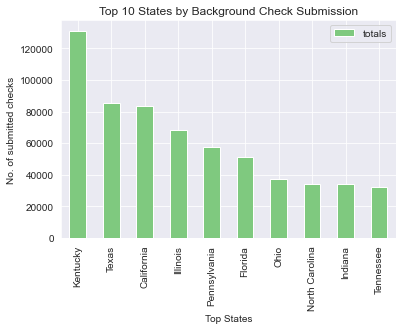

In [36]:
# plotting a bar to see the top ten states
top_states.plot.bar()
plt.title("Top 10 States by Background Check Submission")
plt.xlabel("Top States")
plt.ylabel("No. of submitted checks");

**Let's also look at the top states with the highest transaction per capita**

To do this, there is the need to merge the state dataframe with info on population

In [37]:
# joining the two datasets 
gun_census = pd.concat([state_df, df_2], axis=1)
gun_census.head(3)

,permit,handgun,long_gun,multiple,admin,prepawn_handgun,prepawn_long_gun,redemption_handgun,redemption_long_gun,totals,population
Alabama,4614.277533,9788.709251,11568.409692,463.568282,0.140969,22.078125,33.036458,1585.447917,1818.072917,29542.198238,4863300.0
Alaska,58.819383,1914.546256,2520.590308,127.330396,0.083700,5.432292,7.619792,162.187500,195.072917,5011.643172,741894.0
Arizona,3129.995595,7847.876652,6523.180617,374.356828,29.264317,7.354167,4.739583,929.322917,589.458333,19496.537445,6931071.0


In [38]:
# dropping the rows with null values
gun_census.dropna(inplace=True)
gun_census.head(3)

,permit,handgun,long_gun,multiple,admin,prepawn_handgun,prepawn_long_gun,redemption_handgun,redemption_long_gun,totals,population
Alabama,4614.277533,9788.709251,11568.409692,463.568282,0.140969,22.078125,33.036458,1585.447917,1818.072917,29542.198238,4863300.0
Alaska,58.819383,1914.546256,2520.590308,127.330396,0.083700,5.432292,7.619792,162.187500,195.072917,5011.643172,741894.0
Arizona,3129.995595,7847.876652,6523.180617,374.356828,29.264317,7.354167,4.739583,929.322917,589.458333,19496.537445,6931071.0


In [39]:
# creating a new column for gun per capita
gun_census["gun_per_pop"] = gun_census["totals"]/gun_census["population"]
gun_census.head()

,permit,handgun,long_gun,multiple,admin,prepawn_handgun,prepawn_long_gun,redemption_handgun,redemption_long_gun,totals,population,gun_per_pop
Alabama,4614.277533,9788.709251,11568.409692,463.568282,0.140969,22.078125,33.036458,1585.447917,1818.072917,29542.198238,4863300.0,0.006075
Alaska,58.819383,1914.546256,2520.590308,127.330396,0.083700,5.432292,7.619792,162.187500,195.072917,5011.643172,741894.0,0.006755
Arizona,3129.995595,7847.876652,6523.180617,374.356828,29.264317,7.354167,4.739583,929.322917,589.458333,19496.537445,6931071.0,0.002813
Arkansas,2237.669604,4253.674009,7327.118943,272.770925,9.453744,8.343750,20.807292,782.265625,1920.276042,16531.422907,2988248.0,0.005532
California,28768.911894,26039.118943,26153.171806,915.700441,73.480176,0.000000,0.000000,192.000000,162.927083,83762.392070,39250017.0,0.002134


In [40]:
# selecting the top 10 states with highest background check submission per population
states_top = gun_census.sort_values(by="gun_per_pop", ascending=False).head(10)[["gun_per_pop"]]
states_top

,gun_per_pop
Kentucky,0.029550
Montana,0.007962
West Virginia,0.007720
Alaska,0.006755
Wyoming,0.006729
Utah,0.006264
South Dakota,0.006188
Alabama,0.006075
Arkansas,0.005532
North Dakota,0.005507


This table above shows the submission for each state by population

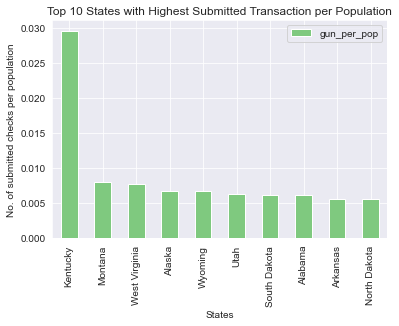

In [41]:
# let's see what are the top 10 states
states_top.plot.bar()
plt.title("Top 10 States with Highest Submitted Transaction per Population")
plt.xlabel("States")
plt.ylabel("No. of submitted checks per population");

**Looking at the total number of checks submitted we see the following 10 states have the highest submission:**
- *Kentucky, Texas, California, Illinois, Pennsylvania, Florida, Ohio, North Carolina, Indiana and Tennessee*
  
**When we look at the total number of transactions submitted per population, we have the following top 10 states:**
- *Kentucky, Montana, West Virginia, Alaska, Wyoming, Utah, South Dakota, Alabama, Arkansas and North Dakota*

### 2. Is there a growth in attempt to purchase firearms from 1998 till 2017?

In [42]:
# grouping dataset by year
gun_trend = df_1.groupby(df_1["month"].dt.year).mean()
gun_trend.rename_axis("year", inplace=True)
gun_trend

,permit,handgun,long_gun,multiple,admin,prepawn_handgun,prepawn_long_gun,redemption_handgun,redemption_long_gun,totals
year,,,,,,,,,,
1998,710.627273,2000.001293,5298.107590,79.272727,20.172727,4.819795,7.819346,407.390937,598.424345,8108.163636
1999,1572.272727,3843.554539,7905.237642,157.186364,224.425101,4.819795,7.819346,407.390937,598.424345,13702.646970
2000,1860.324242,3321.028788,7242.390909,145.116667,199.466667,4.819795,7.819346,407.390937,598.424345,12768.327273
2001,2133.845455,3283.656061,7489.962121,147.169697,151.706061,5.545149,10.812994,346.450778,558.397047,13363.704545
2002,2065.471212,2795.624242,6680.774242,141.013636,116.346802,7.700016,16.787934,259.168182,594.510606,12677.377273
2003,2126.590406,2804.685466,6640.998464,150.357576,105.978795,7.796970,13.115152,275.647004,605.609099,12730.672727
2004,2038.896970,3015.850215,6828.557326,154.522727,78.119697,5.974242,9.786364,276.574242,591.556084,12999.834848
2005,2046.722756,3396.794052,6946.181630,166.287879,19.936449,4.774274,8.760995,277.448891,569.247071,13434.931818
2006,3087.787892,3698.977273,7256.956061,197.146970,63.321212,4.766667,8.965152,282.401515,540.681818,15140.995455


> The above table groups the average checks submitted by year.
> This would useful in viewing different trends over time.

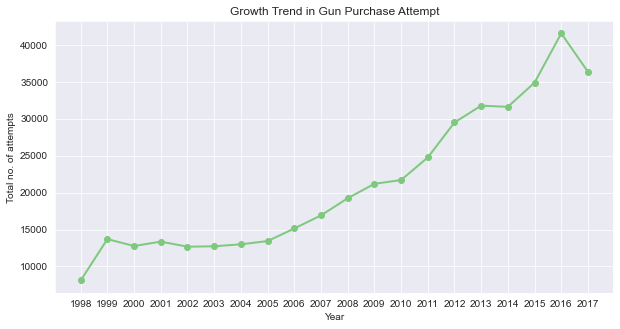

In [43]:
# let's look at the trend with the aid of a line graph
trend = gun_trend.copy()
trend.reset_index(inplace=True)
trend["year"] = trend["year"].astype(str) # making a copy of the dataset so as to set appropriate ticks
plt.figure(figsize=(10, 5))
plt.plot("year", "totals", data=trend, linewidth=2, marker="o", markersize=6)
plt.title("Growth Trend in Gun Purchase Attempt")
plt.xlabel("Year")
plt.ylabel("Total no. of attempts")
plt.show()

- The chart above shows rising trend in the number of backgorund checks submitted from 1998-2016 which may indicate a growth in attempt to purchase a firearm but a sharp decline in 2017.

### 3. Which gun type is preferred?

In [44]:
# getting proportion of transactions submitted for hand and long gun
pre_gun = gun_trend[["handgun","long_gun"]].div(gun_trend.totals, axis=0)
pre_gun

,handgun,long_gun
year,,
1998,0.246665,0.653429
1999,0.280497,0.576913
2000,0.260099,0.567215
2001,0.245715,0.560470
2002,0.220521,0.526984
2003,0.220309,0.521653
2004,0.231991,0.525280
2005,0.252833,0.517024
2006,0.244302,0.479292


> The above table shows the proportion of yearly submission over the years for the Handgun and Long gun.
>
> It can be used to understand the trend of checks submitted for each type over the years

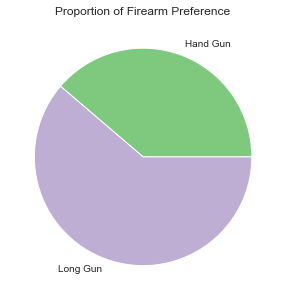

In [45]:
# let's see the preferred gun type over the years
pre_gun.mean().plot.pie(labels=["Hand Gun", "Long Gun"], figsize=(5,5))
plt.title("Proportion of Firearm Preference")
plt.ylabel("");

- Long gun has the highest average cheks submitted over the years

> It would be good to define a bar chart function to avoid repetitive code

In [46]:
def plot_bar(y, y1):
    x = trend["year"]
    plt.figure(figsize=(10,8))
    plt.bar(x, y, alpha=0.8)
    plt.bar(x, y1, alpha=0.8)
    plt.title("Yearly Proportion of Submission by Gun Type")
    plt.xlabel("Year")
    plt.ylabel("Proportion of Checks Submitted")
    plt.legend(legend)
    plt.show()

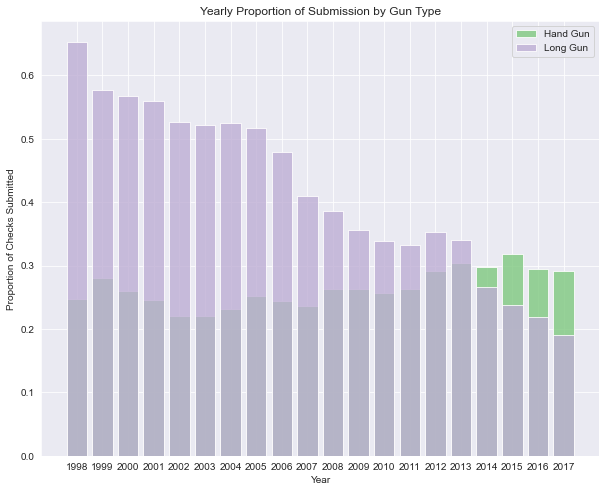

In [47]:
# let's look at the no. of submission for each gun type over the years
legend = ["Hand Gun", "Long Gun"]
plot_bar(pre_gun["handgun"], pre_gun["long_gun"])

- There seem to be a higher background check submission for long guns which may suggest individuals attempt to purchase that type more over hand guns

In [48]:
# let's look at the no. of submission for pre-pawned and redemption firearms over the years
rel_gun = gun_trend[["prepawn_handgun", "prepawn_long_gun", "redemption_handgun", "redemption_long_gun"]].div(gun_trend.totals, axis=0)
rel_gun

,prepawn_handgun,prepawn_long_gun,redemption_handgun,redemption_long_gun
year,,,,
1998,0.000594,0.000964,0.050245,0.073805
1999,0.000352,0.000571,0.029731,0.043672
2000,0.000377,0.000612,0.031906,0.046868
2001,0.000415,0.000809,0.025925,0.041785
2002,0.000607,0.001324,0.020443,0.046895
2003,0.000612,0.001030,0.021652,0.047571
2004,0.000460,0.000753,0.021275,0.045505
2005,0.000355,0.000652,0.020651,0.042371
2006,0.000315,0.000592,0.018651,0.035710


> The above table shows the proportion of yearly submission over the years for the following gun types: Prepawn handgun, Prepawn long gun, Redemption handgun and Redemption long gun.
>
> It is useful to help see the trend of checks submitted for each type over the years

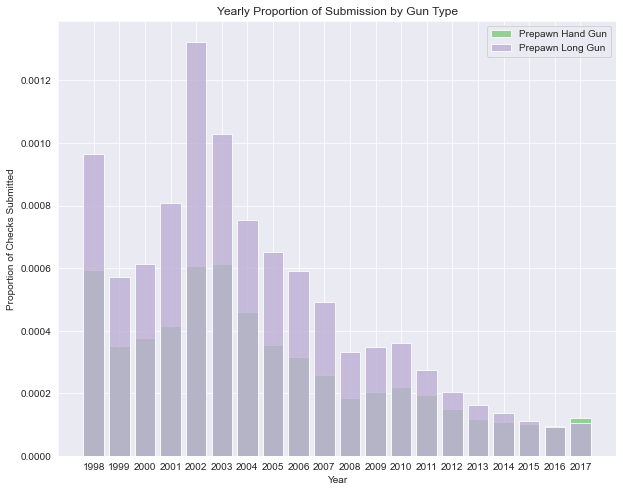

In [49]:
# let's look at the no. of submission for pre-pawned hand and long gun over the years
legend = ["Prepawn Hand Gun", "Prepawn Long Gun"]
plot_bar(rel_gun["prepawn_handgun"], rel_gun["prepawn_long_gun"])

- Looking at pre-pawned hand and long guns we also see higher checks submission for pre-pawned long guns which could suggest the preference for long guns over hand guns

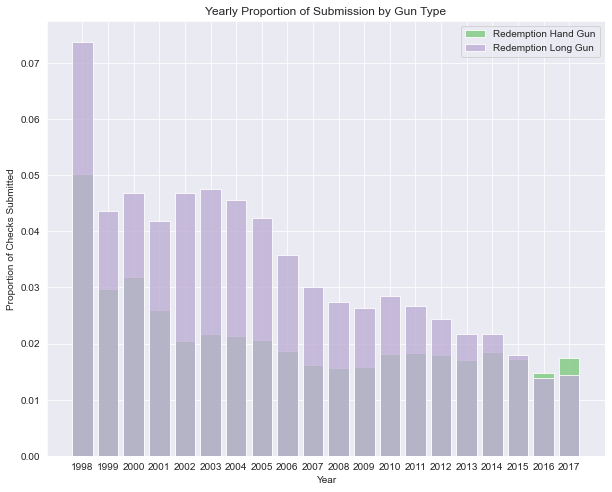

In [50]:
# let's look at the no. of submission for redemption hand and long gun over the years
legend = ["Redemption Hand Gun", "Redemption Long Gun"]
plot_bar(rel_gun["redemption_handgun"], rel_gun["redemption_long_gun"])

- Looking at redemption hand and long guns we can see higher checks submission for redemption long guns which may suggest the preference for long guns over hand guns

### 4. Is there any correlation between population and no of transactions submitted?

In [51]:
# checking for correlation between the population and total_transaction_submitted columns
gun_census["population"].corr(gun_census["totals"])

0.649696633068128

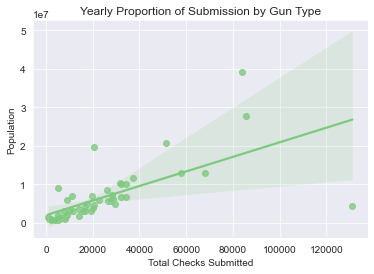

In [52]:
# let's visualize the correlation
sns.regplot(x="totals", y="population", data=gun_census)
plt.title("Yearly Proportion of Submission by Gun Type")
plt.xlabel("Total Checks Submitted")
plt.ylabel("Population");

- There seem to be strong relationship between the number of population and total background checks submission so the higher the poulation the more transactions submitted

<a id='conclusions'></a>
## Conclusions

We looked at the datasets from the *FBI's National Instant Criminal Background Check System (NICS)* and *US Census Data* then explored the following questions:

 + Which states have the highest transactions submitted for background checks?
 + Is there a growth in attempt to purchase firearms from 1998 till 2017?
 + Which gun type is preferred?
 + Are more/less populated areas likely to purchase more firearms?
---
Here are the findings from the exploration carried out:

1. **Which states have the highest transactions submitted for background checks?**

+ When the total number of checks submitted is looked at we see the following 10 states have the highest submission:
        Kentucky, Texas, California, Illinois, Pennsylvania, Florida, Ohio, North Carolina, Indiana and Tennessee
+ When we look at the total number of transactions submitted per population, we have the following top 10 states:  
        Kentucky, Montana, West Virginia, Alaska, Wyoming, Utah, South Dakota, Alabama, Arkansas and North Dakota

2. **Is there a growth in attempt to purchase firearms from 1998 till 2017?**
+ We can see a rising trend in the number of backgorund checks submitted from 1998-2016 which may indicate a growth in attempt to purchase a firearm but a sharp decline in 2017. The decine may not necessarily mean the number is dropping but can be because of incomplete period as we only have 9 months of data for 2017

3. **Which gun type is preferred?**
+ There seem to be a higher background check submission for long guns which may suggest individuals attempt to purchase that type more over hand guns
+ Looking at pre-pawned and redemption hand and long guns we also see higher checks submission for both pre-pawned and redemption long guns which could suggest the preference for long guns over hand guns

4. **Are more/less populated areas likely to purchase more firearms?**
+  It looks like there is a strong relationship between the number of population and total background checks submission so the higher the poulation the more transactions submitted
***
**Limitations**
> - The analysis carried out uses descriptive statistics not inferetial, no hypotheses or controlled experiments was created with the data.
>
> - All columns with over 2000 missing values were dropped in the FBI's NCIS dataset, this could have been filled with various some values e.g mean. This did not allow us to carry out exploration on these columns and understand the relationships.
>
> - The FBI's NCIS dataset has incomplete period (only 9 months data) for the year 2017 which does not allow us to properly understand the trend of gun submission checks over the years.
>
> - Only the population for 2016 was taken from the US Census dataset, other variables could have helped explore more relationships like checks submitted by different age groups
